# CSCI 183 Final Project


In [200]:
import pandas as pd

# Import the initial data 
fire_csv = pd.read_csv("FW_Veg_Rem_Combined.csv")

fire_df = pd.DataFrame(fire_csv)
del fire_df['Unnamed: 0.1']
del fire_df['Unnamed: 0']
fire_df



,fire_name,fire_size,fire_size_class,stat_cause_descr,latitude,longitude,state,disc_clean_date,cont_clean_date,discovery_month,...,Wind_cont,Hum_pre_30,Hum_pre_15,Hum_pre_7,Hum_cont,Prec_pre_30,Prec_pre_15,Prec_pre_7,Prec_cont,remoteness
0,NaN,10.0,C,Missing/Undefined,18.105072,-66.753044,PR,2/11/2007,NaN,Feb,...,3.250413,78.216590,76.793750,76.381579,78.724370,0.0,0.0,0.0,0.0,0.017923
1,NaN,3.0,B,Arson,35.038330,-87.610000,TN,12/11/2006,NaN,Dec,...,2.122320,70.840000,65.858911,55.505882,81.682678,59.8,8.4,0.0,86.8,0.184355
2,NaN,60.0,C,Arson,34.947800,-88.722500,MS,2/29/2004,NaN,Feb,...,3.369050,75.531629,75.868613,76.812834,65.063800,168.8,42.2,18.1,124.5,0.194544
3,WNA 1,1.0,B,Debris Burning,39.641400,-119.308300,NV,6/6/2005,6/6/2005,Jun,...,0.000000,44.778429,37.140811,35.353846,0.000000,10.4,7.2,0.0,0.0,0.487447
4,NaN,2.0,B,Miscellaneous,30.700600,-90.591400,LA,9/22/1999,NaN,Sep,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,0.214633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55362,IMPACT,6289.0,G,Missing/Undefined,39.180000,-96.784167,KS,10/15/2015,NaN,Oct,...,3.804803,65.671410,61.839572,54.625698,55.042092,35.4,8.2,0.0,249.0,0.331501
55363,BUTTE,70868.0,G,Missing/Undefined,38.342719,-120.695967,CA,9/9/2015,10/1/2015,Sep,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,0.124683
55364,WILLOW,5702.0,G,Arson,37.262607,-119.511139,CA,7/25/2015,NaN,Jul,...,2.529158,43.755556,43.755556,44.443975,35.924406,0.0,0.0,0.0,0.0,0.097682
55365,BARKER,3261.0,F,Miscellaneous,40.604300,-123.080450,CA,7/31/2015,9/12/2015,Jul,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,0.178206


In [201]:
# Begin preprocessing 

# Check the NaN values in the data frame for each column. If there are NaN values, save the column names so we can go back and see if those columns are necessary
non_needed_columns = []
for column in fire_df: 
    print(column, "has ", fire_df[column].isna().sum(), " NaN values")
    if fire_df[column].isna().sum() > 0: 
        non_needed_columns.append(column)

print()
print(non_needed_columns)

fire_name has  29454  NaN values
fire_size has  0  NaN values
fire_size_class has  0  NaN values
stat_cause_descr has  0  NaN values
latitude has  0  NaN values
longitude has  0  NaN values
state has  0  NaN values
disc_clean_date has  0  NaN values
cont_clean_date has  27890  NaN values
discovery_month has  0  NaN values
disc_date_final has  26659  NaN values
cont_date_final has  29735  NaN values
putout_time has  27890  NaN values
disc_date_pre has  0  NaN values
disc_pre_year has  0  NaN values
disc_pre_month has  0  NaN values
wstation_usaf has  0  NaN values
dstation_m has  0  NaN values
wstation_wban has  0  NaN values
wstation_byear has  0  NaN values
wstation_eyear has  0  NaN values
Vegetation has  0  NaN values
fire_mag has  0  NaN values
weather_file has  0  NaN values
Temp_pre_30 has  0  NaN values
Temp_pre_15 has  0  NaN values
Temp_pre_7 has  0  NaN values
Temp_cont has  0  NaN values
Wind_pre_30 has  0  NaN values
Wind_pre_15 has  0  NaN values
Wind_pre_7 has  0  NaN val

In [202]:
# After looking at the columns that have NaN values, we realized that features such as "putout time" and "contained data" and more were not needed in our analysis so we could simply
# delete those columns as they would not be necessary to the project. 

for value in non_needed_columns: 
    del fire_df[value] 


In [203]:
# We noticed some of the weather data wasn't found and had -1 values for the weather data. This line of code gets rid of those

fire_df.drop(fire_df.loc[fire_df['weather_file']=='File Not Found'].index, inplace=True)
fire_df.reset_index(drop=True, inplace=True)

In [204]:
fire_df

,fire_size,fire_size_class,stat_cause_descr,latitude,longitude,state,disc_clean_date,discovery_month,disc_date_pre,disc_pre_year,...,Wind_cont,Hum_pre_30,Hum_pre_15,Hum_pre_7,Hum_cont,Prec_pre_30,Prec_pre_15,Prec_pre_7,Prec_cont,remoteness
0,10.0,C,Missing/Undefined,18.105072,-66.753044,PR,2/11/2007,Feb,1/12/2007,2007,...,3.250413,78.216590,76.793750,76.381579,78.724370,0.0,0.0,0.0,0.0,0.017923
1,3.0,B,Arson,35.038330,-87.610000,TN,12/11/2006,Dec,11/11/2006,2006,...,2.122320,70.840000,65.858911,55.505882,81.682678,59.8,8.4,0.0,86.8,0.184355
2,60.0,C,Arson,34.947800,-88.722500,MS,2/29/2004,Feb,1/30/2004,2004,...,3.369050,75.531629,75.868613,76.812834,65.063800,168.8,42.2,18.1,124.5,0.194544
3,1.0,B,Debris Burning,39.641400,-119.308300,NV,6/6/2005,Jun,5/7/2005,2005,...,0.000000,44.778429,37.140811,35.353846,0.000000,10.4,7.2,0.0,0.0,0.487447
4,5.2,B,Debris Burning,31.316978,-83.393649,GA,1/10/2009,Jan,12/11/2008,2008,...,0.000000,79.896679,73.431818,0.000000,0.000000,26.0,0.0,0.0,0.0,0.148904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41127,3500.0,F,Missing/Undefined,37.606667,-96.422500,KS,2/12/2015,Feb,1/13/2015,2015,...,4.559206,62.971774,69.376658,68.118919,64.008028,20.1,18.8,0.0,3.8,0.365622
41128,11699.0,G,Missing/Undefined,40.394700,-104.564600,CO,9/18/2015,Sep,8/19/2015,2015,...,2.744039,51.010341,50.264501,48.204861,57.236620,4.6,0.0,0.0,4.8,0.199532
41129,6289.0,G,Missing/Undefined,39.180000,-96.784167,KS,10/15/2015,Oct,9/15/2015,2015,...,3.804803,65.671410,61.839572,54.625698,55.042092,35.4,8.2,0.0,249.0,0.331501
41130,5702.0,G,Arson,37.262607,-119.511139,CA,7/25/2015,Jul,6/25/2015,2015,...,2.529158,43.755556,43.755556,44.443975,35.924406,0.0,0.0,0.0,0.0,0.097682


In [176]:
import matplotlib.pyplot as plt
import geopandas as gpd
import earthpy as et
usa_map = gpd.read_file('/Users/connorcallahan/downloads/cb_2018_us_nation_5m/cb_2018_us_nation_5m.shp')
aoi_bounds = usa_map.geometry.total_bounds
aoi_bounds
xmin, ymin, xmax, ymax = aoi_bounds

In [177]:
def findLonLat(df, column):
    x = []
    y = []
    for id in df.index: 
        if df.iloc[id][column] == 1: 
            if df.iloc[id]['Temp_cont'] != 0 and df.iloc[id]['Wind_cont'] != 0:
                x.append(df.iloc[id]['longitude'])
                y.append(df.iloc[id]['latitude'])
                
    return x, y

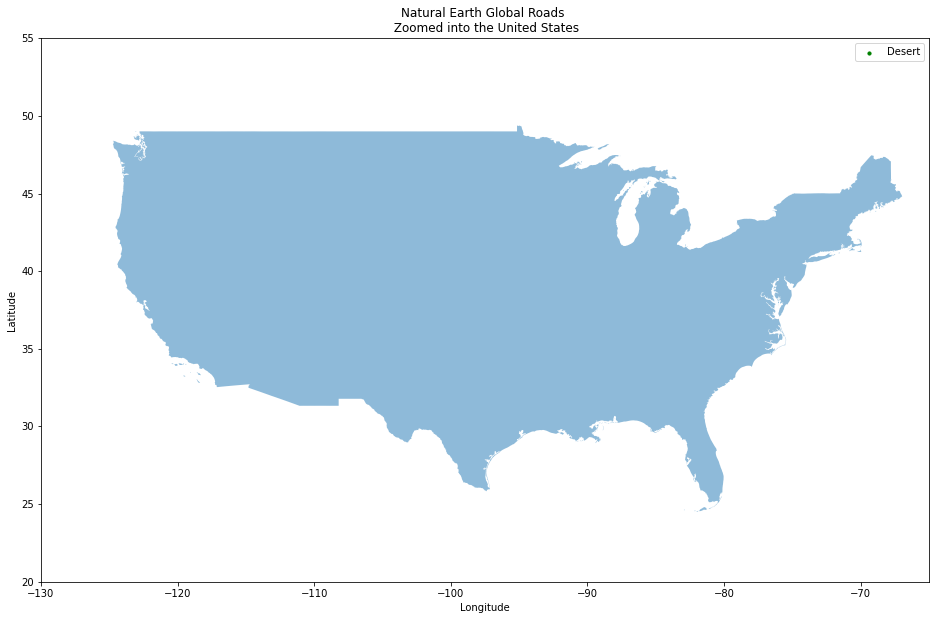

In [178]:
# Plot the data with a modified spatial extent
fig, ax = plt.subplots(figsize = (20,10))

xlim = ([-130, -65])
ylim = ([20,  55])

ax.set_xlim(xlim)
ax.set_ylim(ylim)

usa_map.plot(alpha = .5, ax = ax)

# x, y = findLonLat(fire_df, 'Open Shrubland')
# plt.scatter(x, y, c='lightblue',s=25, label='Open Shrubland')

# x, y = findXY(fire_df, 'Polar Desert/Rock/Ice')
# plt.scatter(x, y, c='red', label='Polar Desert/Rock/Ice')

# x, y = findLonLat(fire_df, 'Secondary Tropical Evergreen Broadleaf Forest')
# plt.scatter(x, y, c='green',s=25, label='Secondary Tropical Evergreen Broadleaf Forest')

# x, y = findLonLat(fire_df, 'Temperate Evergreen Needleleaf Forest TmpENF')
# plt.scatter(x, y, c='lightblue',s=25, label='Temperate Evergreen Needleleaf Forest TmpENF')

# x, y = findLonLat(fire_df, 'C3 Grassland/Steppe')
# plt.scatter(x, y, c='orange',s=25, label='C3 Grassland/Steppe')

x, y = findLonLat(fire_df, 'state')
plt.scatter(x, y, c='green', s=10, label='Desert')

plt.legend()



ax.set(title='Natural Earth Global Roads \n Zoomed into the United States')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [205]:
# Find unique causes for fires: 
def checkCause(data_frame):
    cause_list = {}
    for value in data_frame['stat_cause_descr']:
        if value not in cause_list.keys():
            cause_list[value] = 0

    for value in data_frame['stat_cause_descr']:
        if cause_list[value] == 0:
            cause_list[value] = 1
        else:
            cause_list[value] += 1
    return cause_list

cause_list_ = checkCause(fire_df)
cause_list_

{'Missing/Undefined': 3361,
 'Arson': 6848,
 'Debris Burning': 10720,
 'Campfire': 1030,
 'Miscellaneous': 6345,
 'Fireworks': 175,
 'Lightning': 6467,
 'Equipment Use': 3219,
 'Children': 955,
 'Smoking': 852,
 'Railroad': 694,
 'Structure': 58,
 'Powerline': 408}

<AxesSubplot:>

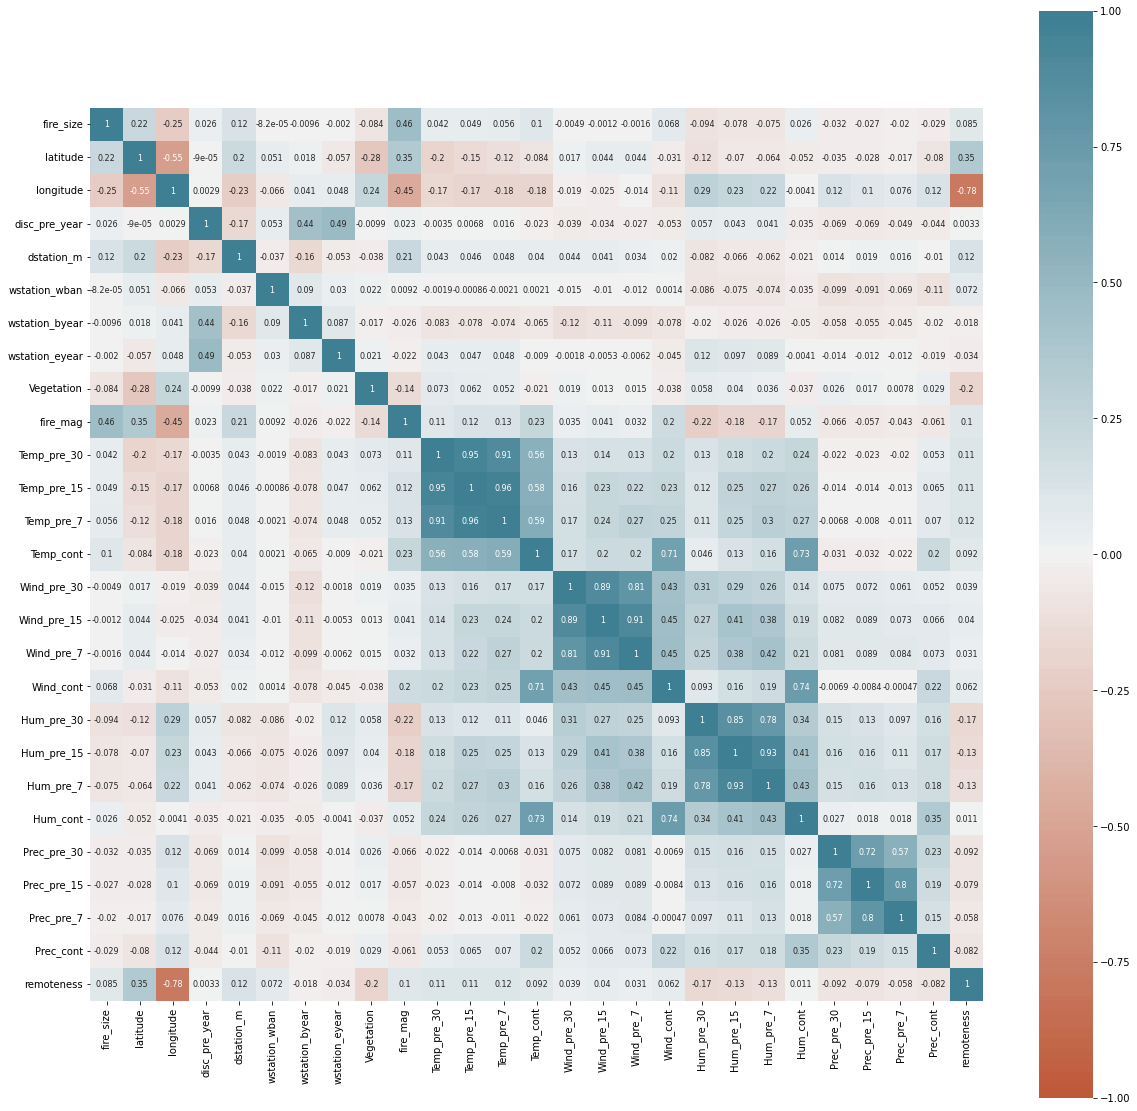

In [206]:
#Look at correlations on all of the fires

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

californiaFire = fire_df.corr()
#visualize the data to see where the correlations exist
plt.subplots(figsize=(20,20))
sns.heatmap(
    californiaFire,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(22, 220, n=150),
    annot=True, annot_kws={'size': 8},
    square=True
)

In [207]:
#Print the unique correlation. For example, wind 10 days before is highly correlated with wind 5 days before. Don't look at this correlation. 
temp_array = {}
temp_list = []
for line in californiaFire: 
    temp_array[line] = []

def rArray(t_list, t_array, corr):
    for i in corr: #go through correlation matrix by column
        for j in corr: #go through correlation matrix by row
            value = corr[i][j] #set the cell value to value
            if  value > .99999: #if the value is 1 or greater
                break
            elif value > 0.70 or value < -0.70: #if the value would represent a correlation
                t_list.append(value) #put the value in the array of r-values
                t_array[j].append(i) #note the correlation in the dictionary        
    return t_list
    return t_array

def corrObserve(t_array, t_list):
    n = 0
    for i in t_array: #access the dictionary
        if t_array[i] != []: #if the dictionary is not empty
            for j in t_array[i]: #go through each value per key
                if i[0] != j[0]:
                    if t_list[n] < 1 and t_list[n] > 0: #if the corresponding value in the correlation array is positive:
                        print("\u0332".join(i), " has a strong, positive correlation to", "\u0332".join(j), "with an r value of: ", t_list[n]) #print the relation and the r value
                        print()
                    elif t_list[n] > -1 and t_list[n] < 0: #if the corresponding value in the correlation array is negative:
                        print(i," has a strong, negative correlation to ", j, " with an r value of: ", t_list[n]) #print the relation and the r value
                        print()
                    n += 1

rArray(temp_list, temp_array, californiaFire)
corrObserve(temp_array, temp_list)    
        

    

l̲o̲n̲g̲i̲t̲u̲d̲e  has a strong, positive correlation to r̲e̲m̲o̲t̲e̲n̲e̲s̲s with an r value of:  0.9506058653716708

T̲e̲m̲p̲_̲c̲o̲n̲t  has a strong, positive correlation to W̲i̲n̲d̲_̲c̲o̲n̲t with an r value of:  0.9052710749563354

T̲e̲m̲p̲_̲c̲o̲n̲t  has a strong, positive correlation to H̲u̲m̲_̲c̲o̲n̲t with an r value of:  0.9611402020269891

W̲i̲n̲d̲_̲c̲o̲n̲t  has a strong, positive correlation to H̲u̲m̲_̲c̲o̲n̲t with an r value of:  0.8936443219406257



{'fire_size': [], 'latitude': [], 'longitude': ['remoteness'], 'disc_pre_year': [], 'dstation_m': [], 'wstation_wban': [], 'wstation_byear': [], 'wstation_eyear': [], 'Vegetation': [], 'fire_mag': [], 'Temp_pre_30': ['Temp_pre_15', 'Temp_pre_7'], 'Temp_pre_15': ['Temp_pre_7'], 'Temp_pre_7': [], 'Temp_cont': ['Wind_cont', 'Hum_cont'], 'Wind_pre_30': ['Wind_pre_15', 'Wind_pre_7'], 'Wind_pre_15': ['Wind_pre_7'], 'Wind_pre_7': [], 'Wind_cont': ['Hum_cont'], 'Hum_pre_30': ['Hum_pre_15', 'Hum_pre_7'], 'Hum_pre_15': ['Hum_pre_7'], 'Hum_pre_7': [], 'Hum_cont': [], 'Prec_pre_30': ['Prec_pre_15'], 'Prec_pre_15': ['Prec_pre_7'], 'Prec_pre_7': [], 'Prec_cont': [], 'remoteness': []}


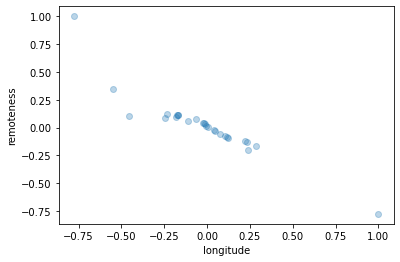

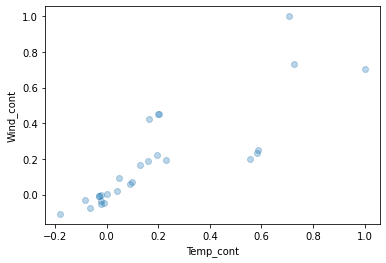

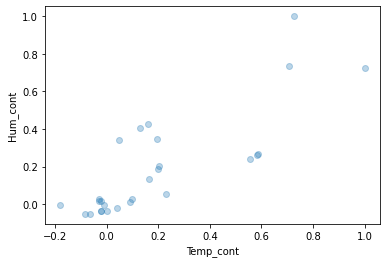

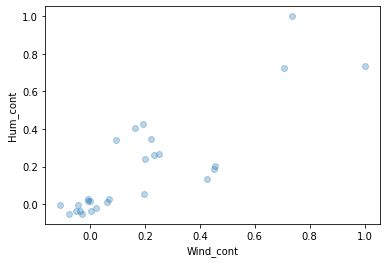

fire_size_class
discovery_month
disc_date_pre
disc_pre_month
wstation_usaf
weather_file


In [208]:
#initiate the array and dictionary to be used for correlation analysis: 
temp_array = {}
temp_list = []
for line in californiaFire: 
    temp_array[line] = []

rArray(temp_list, temp_array, californiaFire)
def printPlot(t_array):
    print(t_array)
    for i in t_array:
            x = californiaFire[i]
            for j in t_array[i]:
                if i[0] != j[0]:
                    if len(t_array[i]) != 0:
                        y = californiaFire[j]
                        
                        plt.scatter(x, y, alpha=.3)
                        plt.xlabel(i)
                        plt.ylabel(j)
                        plt.show()
                
    
        
printPlot(temp_array) 
# Clean the data to only the columns that we want to observe
for value in fire_df.columns: 
    if value not in temp_array and value != 'stat_cause_descr' and value != 'disc_clean_date'and value != 'state':
        print(value)
        del fire_df[value]
del fire_df['disc_pre_year']

In [209]:
# Clean up the data set for other unneeded data 
del fire_df['wstation_wban']
del fire_df['wstation_byear']
del fire_df['wstation_eyear']
del fire_df['dstation_m']

for column in fire_df.columns:
    if column[-2:] == '30' :
        del fire_df[column]

fire_df

,fire_size,stat_cause_descr,latitude,longitude,state,disc_clean_date,Vegetation,fire_mag,Temp_pre_15,Temp_pre_7,...,Wind_pre_15,Wind_pre_7,Wind_cont,Hum_pre_15,Hum_pre_7,Hum_cont,Prec_pre_15,Prec_pre_7,Prec_cont,remoteness
0,10.0,Missing/Undefined,18.105072,-66.753044,PR,2/11/2007,12,1.0,24.716923,24.902597,...,3.492857,3.262092,3.250413,76.793750,76.381579,78.724370,0.0,0.0,0.0,0.017923
1,3.0,Arson,35.038330,-87.610000,TN,12/11/2006,15,0.1,7.010000,0.343529,...,2.881707,1.976471,2.122320,65.858911,55.505882,81.682678,8.4,0.0,86.8,0.184355
2,60.0,Arson,34.947800,-88.722500,MS,2/29/2004,16,1.0,5.782766,5.558750,...,2.923830,2.695833,3.369050,75.868613,76.812834,65.063800,42.2,18.1,124.5,0.194544
3,1.0,Debris Burning,39.641400,-119.308300,NV,6/6/2005,0,0.1,18.996181,18.142564,...,3.398329,3.671282,0.000000,37.140811,35.353846,0.000000,7.2,0.0,0.0,0.487447
4,5.2,Debris Burning,31.316978,-83.393649,GA,1/10/2009,12,0.1,16.409326,0.000000,...,1.727202,0.000000,0.000000,73.431818,0.000000,0.000000,0.0,0.0,0.0,0.148904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41127,3500.0,Missing/Undefined,37.606667,-96.422500,KS,2/12/2015,0,50.0,3.039857,4.437563,...,5.694737,4.975000,4.559206,69.376658,68.118919,64.008028,18.8,0.0,3.8,0.365622
41128,11699.0,Missing/Undefined,40.394700,-104.564600,CO,9/18/2015,14,100.0,19.293642,18.678201,...,2.553364,2.638542,2.744039,50.264501,48.204861,57.236620,0.0,0.0,4.8,0.199532
41129,6289.0,Missing/Undefined,39.180000,-96.784167,KS,10/15/2015,0,100.0,16.891282,18.918994,...,2.705398,3.196648,3.804803,61.839572,54.625698,55.042092,8.2,0.0,249.0,0.331501
41130,5702.0,Arson,37.262607,-119.511139,CA,7/25/2015,0,100.0,28.425403,28.166667,...,2.649395,2.667722,2.529158,43.755556,44.443975,35.924406,0.0,0.0,0.0,0.097682


| Term List | Description |
| :- | :- |
| fire_size | Size of Fire |
| stat_cause_descr | Cause of Fire |
| latitude | Latitude of Fire |
| longitude| Longitude of Fire |
| discovery_month | Month in which Fire was discovered |
| Vegetation | Dominant vegetation in the areas |
| fire_mag: | Magnitude of fire intensity (scaled version of fire_size) | 
| Temp_pre_15: | temperature in deg C at the location of fire up to 15 days prior |
| Temp_pre_7:  | temperature in deg C at the location of fire up to 7 days prior  |
| Temp_cont:   | temperature in deg C at the location of fire upto day the fire was contained|
| Wind_pre_15: | wind in m/s at the location of fire up to 15 days prior |
| Wind_pre_7:  | wind in m/s at the location of fire up to 7 days prior  |
| Wind_cont:   | wind in m/s at the location of fire up to day the fire was contained |
| Hum_pre_15:  | humidity in % at the location of fire up to 15 days prior |
| Hum_pre_7:   | humidity in % at the location of fire up to 7 days prior |
| Hum_cont:    | humidity in % at the location of fire up to day the fire was contained |
| Prec_pre_15: | precipitation in mm at the location of fire up to 15 days prior |
| Prec_pre_7:  | precipitation in mm at the location of fire up to 7 days prior  |
| Prec_cont:   | precipitation in mm at the location of fire up to day the fire was contained |
| remoteness:  | non-dimensional distance to closest city |

Slope =  -0.7978246362040419 ; Intercept =  0.0006699030654533401 ; Error =  0.0621222109134516


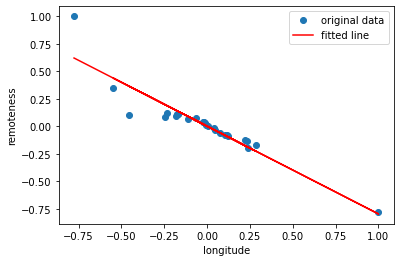

Slope =  0.7750814791081899 ; Intercept =  0.03830337245712809 ; Error =  0.10443642792024024


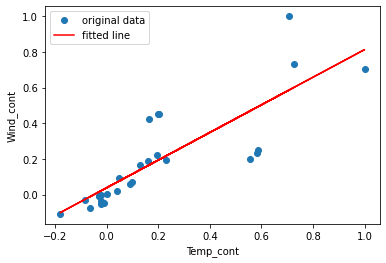

Slope =  0.7505395133761986 ; Intercept =  0.04627238171930348 ; Error =  0.10687774703319865


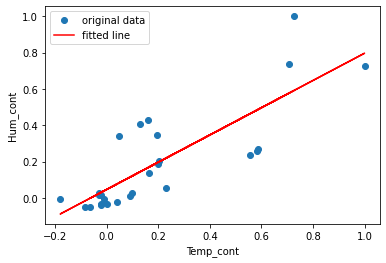

Slope =  0.8389237039364358 ; Intercept =  0.03365593816214488 ; Error =  0.10355780510139886


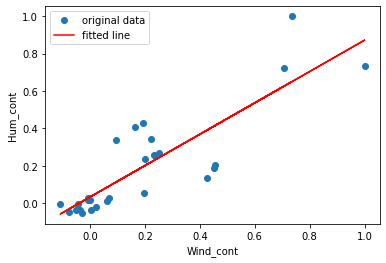

In [210]:
#Print the linear regression lines on the correlation graphs. 
import numpy as np
from scipy.stats import linregress

temp_array = {}
temp_list = []
for line in californiaFire: 
    temp_array[line] = []

rArray(temp_list, temp_array, californiaFire)
def findSIError(t_array):
    for i in t_array:
        X = californiaFire[i]
        for j in t_array[i]:
            if i[0] != j[0]:
                if len(t_array[i]) != 0:
                    Y = californiaFire[j]
                    mask = ~np.isnan(X) & ~np.isnan(Y)
                    result = linregress(X[mask], Y[mask])
                    print("Slope = ",result.slope, "; Intercept = ", result.intercept, "; Error = ", result.stderr)
                    plt.plot(X, Y, 'o', label='original data')
                    plt.plot(X, result.intercept + result.slope*X, 'r', label='fitted line')
                    plt.legend()
                    plt.xlabel(i)
                    plt.ylabel(j)
                    plt.show()
                    
findSIError(temp_array)

In [221]:
# See how many different types of vegitation there is 
Vegetation_desc = {0: 'Other', 1: 'Tropical Evergreen Broadleaf Forest', 2: 'Tropical Deciduous Broadleaf Forest', 3: 'Temperate Evergreen Broadleaf Forest', 4: 'Temperate Evergreen Needleleaf Forest TmpENF',
                    5: 'Temperate Deciduous Broadleaf Forest', 6: 'Boreal Evergreen Needleleaf Forest', 7: 'Boreal Deciduous Needleleaf Forest', 8: 'Savanna', 9: 'C3 Grassland/Steppe', 10: 'C4 Grassland/Steppe',
                     11: 'Dense Shrubland', 12: 'Open Shrubland', 13: 'Tundra Tundra', 14: 'Desert', 15:' Polar Desert/Rock/Ice', 16: 'Secondary Tropical Evergreen Broadleaf Forest', 
                     17: 'Secondary Tropical Deciduous Broadleaf Forest', 18: 'Secondary Temperate Evergreen Broadleaf Forest', 19: 'Secondary Temperate Evergreen Needleleaf Forest', 
                     20: 'Secondary Temperate Deciduous Broadleaf Forest', 21: 'Secondary Boreal Evergreen Needleleaf Forest', 22: 'Secondary Boreal Deciduous Needleleaf Forest', 23: 'Water/Rivers Water', 
                     24: 'C3 Cropland', 25: 'C4 Cropland', 26: 'C3 Pastureland', 27: 'C4 Pastureland', 28: 'Urban land'}
vegetation_dict = {}
for i in fire_df['Vegetation']:
    vegetation_dict[i] = 0

for i in fire_df['Vegetation']:
    if vegetation_dict[i] == 0:
        vegetation_dict[i] = 1
    else: 
        vegetation_dict[i] +=1

for i in vegetation_dict:
    if i in Vegetation_desc:
        print('Amount of ',Vegetation_desc[i], '= ', vegetation_dict[i])
    else: 
        print('Class ', i, 'is not in the description list')



veg_col_names = []
for value in vegetation_dict:
    if value in Vegetation_desc:
        veg_col_names.append(Vegetation_desc[value])
veg_col_names.append('Total')
print(veg_col_names)

vegitation_desc_df = pd.DataFrame(columns=veg_col_names)
for value in fire_df['Vegetation']:
    if value in Vegetation_desc.keys():
        if Vegetation_desc[value] == 'Open Shrubland':
            vegitation_desc_df.loc[len(vegitation_desc_df.index)] = [1, 0, 0, 0, 0, 0, 0, 1]
        elif Vegetation_desc[value] == 'Polar Desert/Rock/Ice':
            vegitation_desc_df.loc[len(vegitation_desc_df.index)] = [0, 1, 0, 0, 0, 0, 0, 1]
        elif Vegetation_desc[value] == 'Secondary Tropical Evergreen Broadleaf Forest':
            vegitation_desc_df.loc[len(vegitation_desc_df.index)] = [0, 0, 1, 0, 0, 0, 0, 1]
        elif Vegetation_desc[value] == 'Temperate Evergreen Needleleaf Forest TmpENF':
            vegitation_desc_df.loc[len(vegitation_desc_df.index)] = [0, 0, 0, 1, 0, 0, 0, 1]
        elif Vegetation_desc[value] == 'C3 Grassland/Steppe':
            vegitation_desc_df.loc[len(vegitation_desc_df.index)] = [0, 0, 0, 0, 1, 0, 0, 1]
        elif Vegetation_desc[value] == 'Desert':
            vegitation_desc_df.loc[len(vegitation_desc_df.index)] = [0, 0, 0, 0, 0, 1, 0, 1]
        elif Vegetation_desc[value] == 'Other':
            vegitation_desc_df.loc[len(vegitation_desc_df.index)] = [0, 0, 0, 0, 0, 0, 1, 1]
    elif value == 0:
        vegitation_desc_df.loc[len(vegitation_desc_df.index)] = [0, 0, 0, 0, 0, 0, 0, 0]

Amount of  Open Shrubland =  13061
Amount of   Polar Desert/Rock/Ice =  8161
Amount of  Secondary Tropical Evergreen Broadleaf Forest =  8828
Amount of  Other =  7190
Amount of  Temperate Evergreen Needleleaf Forest TmpENF =  636
Amount of  C3 Grassland/Steppe =  2767
Amount of  Desert =  489
['Open Shrubland', ' Polar Desert/Rock/Ice', 'Secondary Tropical Evergreen Broadleaf Forest', 'Other', 'Temperate Evergreen Needleleaf Forest TmpENF', 'C3 Grassland/Steppe', 'Desert', 'Total']


In [186]:
# del fire_df['Vegetation']

In [222]:
fire_df = pd.concat([fire_df, vegitation_desc_df], axis=1)

In [223]:
fire_df.drop(fire_df.loc[fire_df['Total']==0].index, inplace=True)
fire_df.reset_index(drop=True, inplace=True)

ValueError: Cannot index with multidimensional key

In [224]:
fire_df

,fire_size,stat_cause_descr,latitude,longitude,state,disc_clean_date,Vegetation,fire_mag,Temp_pre_15,Temp_pre_7,...,Desert,Total,Open Shrubland,Polar Desert/Rock/Ice,Secondary Tropical Evergreen Broadleaf Forest,Other,Temperate Evergreen Needleleaf Forest TmpENF,C3 Grassland/Steppe,Desert,Total
0,10.0,Missing/Undefined,18.105072,-66.753044,PR,2/11/2007,12,1.0,24.716923,24.902597,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,3.0,Arson,35.038330,-87.610000,TN,12/11/2006,15,0.1,7.010000,0.343529,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,60.0,Arson,34.947800,-88.722500,MS,2/29/2004,16,1.0,5.782766,5.558750,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,1.0,Debris Burning,39.641400,-119.308300,NV,6/6/2005,0,0.1,18.996181,18.142564,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5.2,Debris Burning,31.316978,-83.393649,GA,1/10/2009,12,0.1,16.409326,0.000000,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41127,3500.0,Missing/Undefined,37.606667,-96.422500,KS,2/12/2015,0,50.0,3.039857,4.437563,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41128,11699.0,Missing/Undefined,40.394700,-104.564600,CO,9/18/2015,14,100.0,19.293642,18.678201,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41129,6289.0,Missing/Undefined,39.180000,-96.784167,KS,10/15/2015,0,100.0,16.891282,18.918994,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41130,5702.0,Arson,37.262607,-119.511139,CA,7/25/2015,0,100.0,28.425403,28.166667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [225]:
import matplotlib.pyplot as plt


def findXY(df, column):
    x = []
    y = []
    for id in df.index: 
        if df.iloc[id][column] == 1: 
            if df.iloc[id]['Temp_cont'] != 0 and df.iloc[id]['Wind_cont'] != 0:
                x.append(df.iloc[id]['Temp_cont'])
                y.append(df.iloc[id]['Wind_cont'])
                
    return x, y
x, y = findXY(fire_df, 'Open Shrubland')




ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

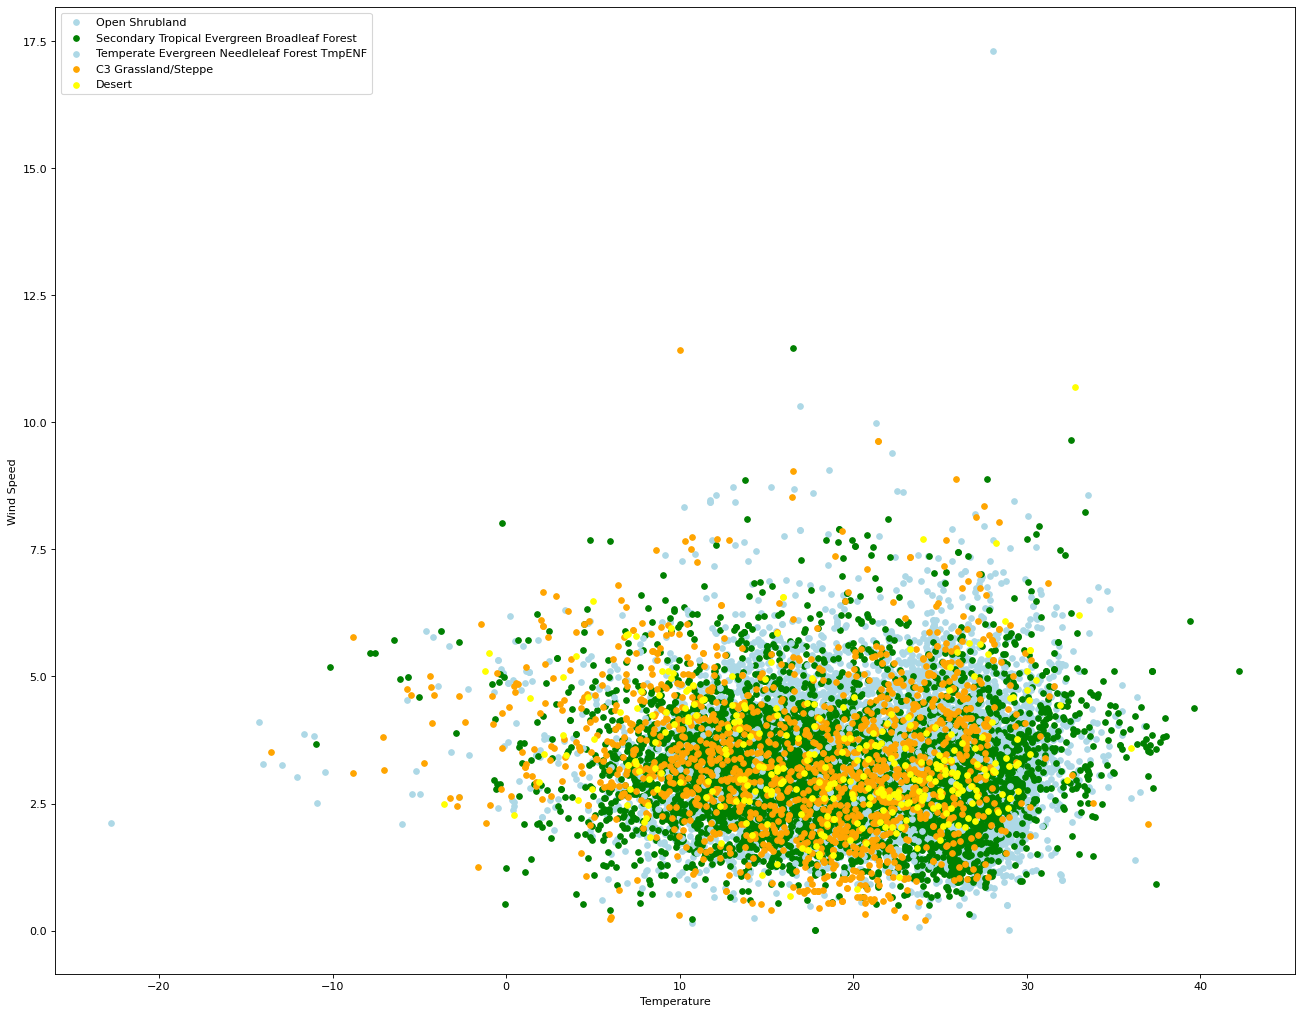

In [191]:
plt.figure(figsize=(20, 16), dpi=80)
plt.scatter(x, y, c='lightblue',s=25, label='Open Shrubland')

x, y = findXY(fire_df, ' Polar Desert/Rock/Ice')
plt.scatter(x, y, c='red', label='Polar Desert/Rock/Ice')

x, y = findXY(fire_df, 'Secondary Tropical Evergreen Broadleaf Forest')
plt.scatter(x, y, c='green',s=25, label='Secondary Tropical Evergreen Broadleaf Forest')

x, y = findXY(fire_df, 'Temperate Evergreen Needleleaf Forest TmpENF')
plt.scatter(x, y, c='lightblue',s=25, label='Temperate Evergreen Needleleaf Forest TmpENF')

x, y = findXY(fire_df, 'C3 Grassland/Steppe')
plt.scatter(x, y, c='orange',s=25, label='C3 Grassland/Steppe')

x, y = findXY(fire_df, 'Desert')
plt.scatter(x, y, c='yellow', s=25, label='Desert')

x, y = findXY(fire_df, 'Other')
plt.scatter(x, y, c='yellow', s=25, label='Other')

plt.legend()

# plt.title('Nuage de points avec Matplotlib')
plt.xlabel('Temperature')
plt.ylabel('Wind Speed')

plt.show()

In [192]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon


In [193]:
import matplotlib.pyplot as plt
import geopandas as gpd
import earthpy as et
usa_map = gpd.read_file('/Users/connorcallahan/downloads/cb_2018_us_nation_5m/cb_2018_us_nation_5m.shp')
aoi_bounds = usa_map.geometry.total_bounds
aoi_bounds
xmin, ymin, xmax, ymax = aoi_bounds

In [197]:
def findLonLat(df, column):
    x = []
    y = []
    for id in df.index: 
        if df.iloc[id][column] == 1: 
            if df.iloc[id]['Temp_cont'] != 0 and df.iloc[id]['Wind_cont'] != 0:
                x.append(df.iloc[id]['longitude'])
                y.append(df.iloc[id]['latitude'])
                
    return x, y

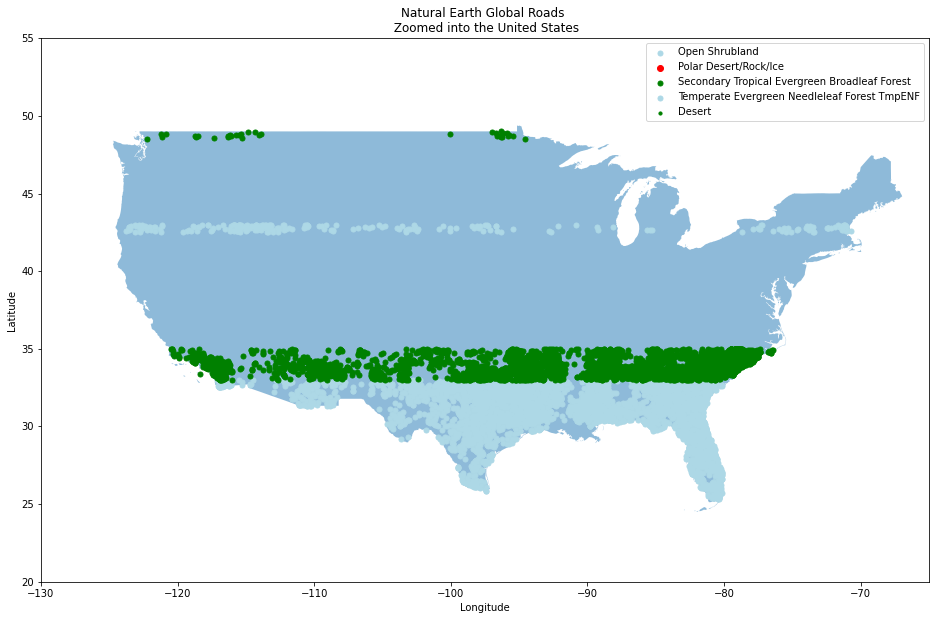

In [198]:
# Plot the data with a modified spatial extent
fig, ax = plt.subplots(figsize = (20,10))

xlim = ([-130, -65])
ylim = ([20,  55])

ax.set_xlim(xlim)
ax.set_ylim(ylim)

usa_map.plot(alpha = .5, ax = ax)

x, y = findLonLat(fire_df, 'Open Shrubland')
plt.scatter(x, y, c='lightblue',s=25, label='Open Shrubland')

x, y = findXY(fire_df, ' Polar Desert/Rock/Ice')
plt.scatter(x, y, c='red', label='Polar Desert/Rock/Ice')

x, y = findLonLat(fire_df, 'Secondary Tropical Evergreen Broadleaf Forest')
plt.scatter(x, y, c='green',s=25, label='Secondary Tropical Evergreen Broadleaf Forest')

x, y = findLonLat(fire_df, 'Temperate Evergreen Needleleaf Forest TmpENF')
plt.scatter(x, y, c='lightblue',s=25, label='Temperate Evergreen Needleleaf Forest TmpENF')

x, y = findLonLat(fire_df, 'C3 Grassland/Steppe')
plt.scatter(x, y, c='orange',s=25, label='C3 Grassland/Steppe')

x, y = findLonLat(fire_df, 'state')
plt.scatter(x, y, c='yellow', s=10, label='Desert')

plt.legend()



ax.set(title='Natural Earth Global Roads \n Zoomed into the United States')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [ ]:
for i in fire_df['latitude']:
    if i < 40 and i > 35: 
        print('Something\'s wrong')
        print(i)

Something's wrong
35.00000001
